In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
merged_df = pd.read_csv('merged_df.csv', encoding='iso-8859-1')

merged_df.sample(3)

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,y1961,y1962,y1963,y1964,y1965,y1966,y1967,y1968,y1969,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,y1979,y1980,y1981,y1982,y1983,y1984,y1985,y1986,y1987,y1988,y1989,y1990,y1991,y1992,y1993,y1994,y1995,y1996,y1997,y1998,y1999,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,y2010,y2011,y2012,y2013,domain_code,domain,population_element_code,population_element,population_item_code,population_item,year_code,year,population_unit,value,flag,flag_description,note,years_existing,average_production,value_per_capita,iso_alpha3,continent
15213,PER,170,Peru,2767,"Molluscs, Other",5142,Food,1000 tonnes,-9.19,-75.02,4.0,4.0,3.0,4.0,4.0,5.0,6.0,6.0,10.0,12.0,14.0,16.0,23.0,16.0,17.0,24.0,19.0,26.0,30.0,26.0,21.0,23.0,19.0,33.0,29.0,30.0,27.0,30.0,35.0,34.0,10.0,21.0,15.0,13.0,21.0,13.0,25.0,44.0,49.0,29.0,24.0,15.0,11.0,41.0,46.0,53.0,63.0,53.0,56.0,126.0,154.0,154,154,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000,32165.485,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,32.830189,32.165485,PER,South America
9970,JAM,109,Jamaica,2534,"Roots, Other",5142,Food,1000 tonnes,18.11,-77.30,8.0,8.0,8.0,10.0,15.0,16.0,12.0,10.0,11.0,19.0,26.0,28.0,20.0,23.0,29.0,27.0,26.0,30.0,30.0,26.0,23.0,22.0,22.0,27.0,28.0,28.0,24.0,23.0,19.0,20.0,19.0,23.0,30.0,32.0,37.0,40.0,29.0,24.0,27.0,18.0,18.0,15.0,15.0,14.0,13.0,16.0,15.0,15.0,19.0,22.0,24.0,25,23,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000,2890.299,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,21.339623,2.890299,JAM,North America
13145,MAR,143,Morocco,2619,Dates,5521,Feed,1000 tonnes,31.79,-7.09,18.0,11.0,16.0,17.0,17.0,18.0,18.0,18.0,18.0,18.0,18.0,19.0,18.0,19.0,19.0,20.0,20.0,18.0,19.0,15.0,13.0,13.0,11.0,5.0,3.0,4.0,8.0,11.0,22.0,24.0,21.0,17.0,22.0,13.0,20.0,16.0,22.0,17.0,15.0,16.0,9.0,14.0,16.0,20.0,17.0,16.0,25.0,23.0,27.0,31.0,27.0,32,30,OA,Annual population,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2017,2017,1000,35739.580,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,17.622642,35.739580,MAR,Africa


In [36]:
merged_df['element'].unique()

array(['Food', 'Feed'], dtype=object)

In [37]:
year_cols = [col for col in merged_df.columns if col.startswith('y') and col[1:].isdigit()]

#### Get the top 5 countries in terms of average_production


In [38]:
top_5_areas = merged_df.groupby('area')['average_production'].mean().nlargest(5)
top_5_areas

area
China, mainland             9853.819979
United States of America    5582.654356
India                       5146.317939
Russian Federation          2563.625747
Brazil                      1903.076573
Name: average_production, dtype: float64

In [39]:
top_5_areas.index

Index(['China, mainland', 'United States of America', 'India',
       'Russian Federation', 'Brazil'],
      dtype='object', name='area')

#### Filter food and feed for top 5 countries


In [40]:
filtered_food = (merged_df['area'].isin(top_5_areas.index)) & (merged_df['element'] == 'Food')
filtered_feed = (merged_df['area'].isin(top_5_areas.index)) & (merged_df['element'] == 'Feed')

In [41]:
merged_df[filtered_food].groupby(['area', 'item'])['average_production'].mean().reset_index()

,area,item,average_production
0,Brazil,Alcoholic Beverages,5466.849057
1,Brazil,Animal fats,380.528302
2,Brazil,Apples and products,461.320755
3,Brazil,"Aquatic Animals, Others",0.377358
4,Brazil,Aquatic Plants,0.000000
...,...,...,...
515,United States of America,Vegetables,28348.886792
516,United States of America,"Vegetables, Other",17204.660377
517,United States of America,Wheat and products,19477.000000
518,United States of America,Wine,1742.849057


#### Get top 5 food per country in top 5


In [42]:
top_5_food = merged_df[filtered_food].groupby(['area', 'item'])['average_production'].mean()
top_5_food = top_5_food.groupby('area').nlargest(5).reset_index(level=0, drop=True).reset_index()

top_5_food

,area,item,average_production
0,Brazil,Cereals - Excluding Beer,15129.226415
1,Brazil,Milk - Excluding Butter,14177.245283
2,Brazil,Fruits - Excluding Wine,13762.622642
3,Brazil,Starchy Roots,10348.716981
4,Brazil,Meat,8237.867925
5,"China, mainland",Vegetables,170690.452830
6,"China, mainland",Cereals - Excluding Beer,163752.188679
7,"China, mainland","Vegetables, Other",150235.811321
8,"China, mainland",Starchy Roots,87244.867925
9,"China, mainland",Rice (Milled Equivalent),80586.169811


#### Plot top 5 food per country in top 5


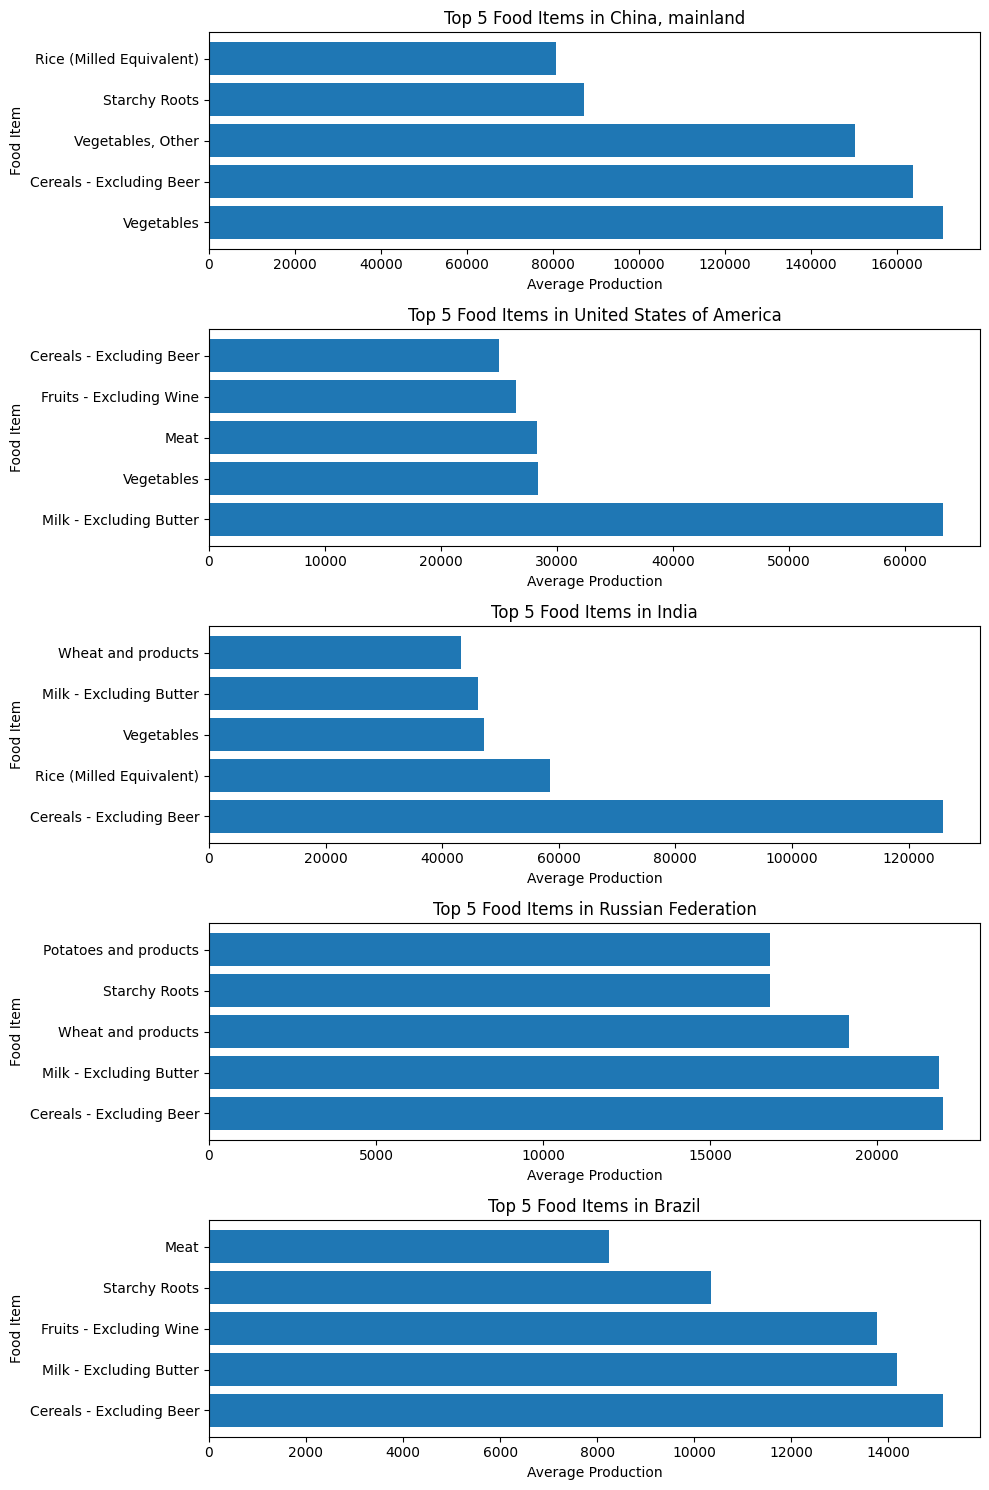

In [43]:
fig, axes = plt.subplots(nrows=len(top_5_areas), figsize=(10, 15))

for i, area in enumerate(top_5_areas.index):
    country_data = top_5_food[top_5_food['area'] == area]
    
    axes[i].barh(country_data['item'], country_data['average_production'])
    axes[i].set_title(f'Top 5 Food Items in {area}')
    axes[i].set_xlabel('Average Production')
    axes[i].set_ylabel('Food Item')

plt.tight_layout()
plt.show()

In [44]:
merged_df[filtered_feed].groupby(['area', 'item'])['average_production'].mean().reset_index()

,area,item,average_production
0,Brazil,Animal fats,3.301887
1,Brazil,Barley and products,67.603774
2,Brazil,"Butter, Ghee",0.396226
3,Brazil,Cassava and products,12162.924528
4,Brazil,Cereals - Excluding Beer,20385.754717
...,...,...,...
155,United States of America,Sunflower seed,175.245283
156,United States of America,Sweet potatoes,36.018868
157,United States of America,Vegetables,140.962264
158,United States of America,"Vegetables, Other",140.962264


#### Get top 5 feed per country in top 5


In [45]:
top_5_feed = merged_df[filtered_feed].groupby(['area', 'item'])['average_production'].mean()
top_5_feed = top_5_feed.groupby('area').nlargest(5).reset_index(level=0, drop=True).reset_index()

top_5_feed

,area,item,average_production
0,Brazil,Cereals - Excluding Beer,20385.754717
1,Brazil,Maize and products,19606.358491
2,Brazil,Starchy Roots,12620.018868
3,Brazil,Cassava and products,12162.924528
4,Brazil,Sugar Crops,7022.037736
5,"China, mainland",Cereals - Excluding Beer,77070.056604
6,"China, mainland",Maize and products,60690.716981
7,"China, mainland",Starchy Roots,47778.754717
8,"China, mainland",Sweet potatoes,34963.377358
9,"China, mainland",Rice (Milled Equivalent),9273.679245


#### Plot top 5 feed per country in top 5


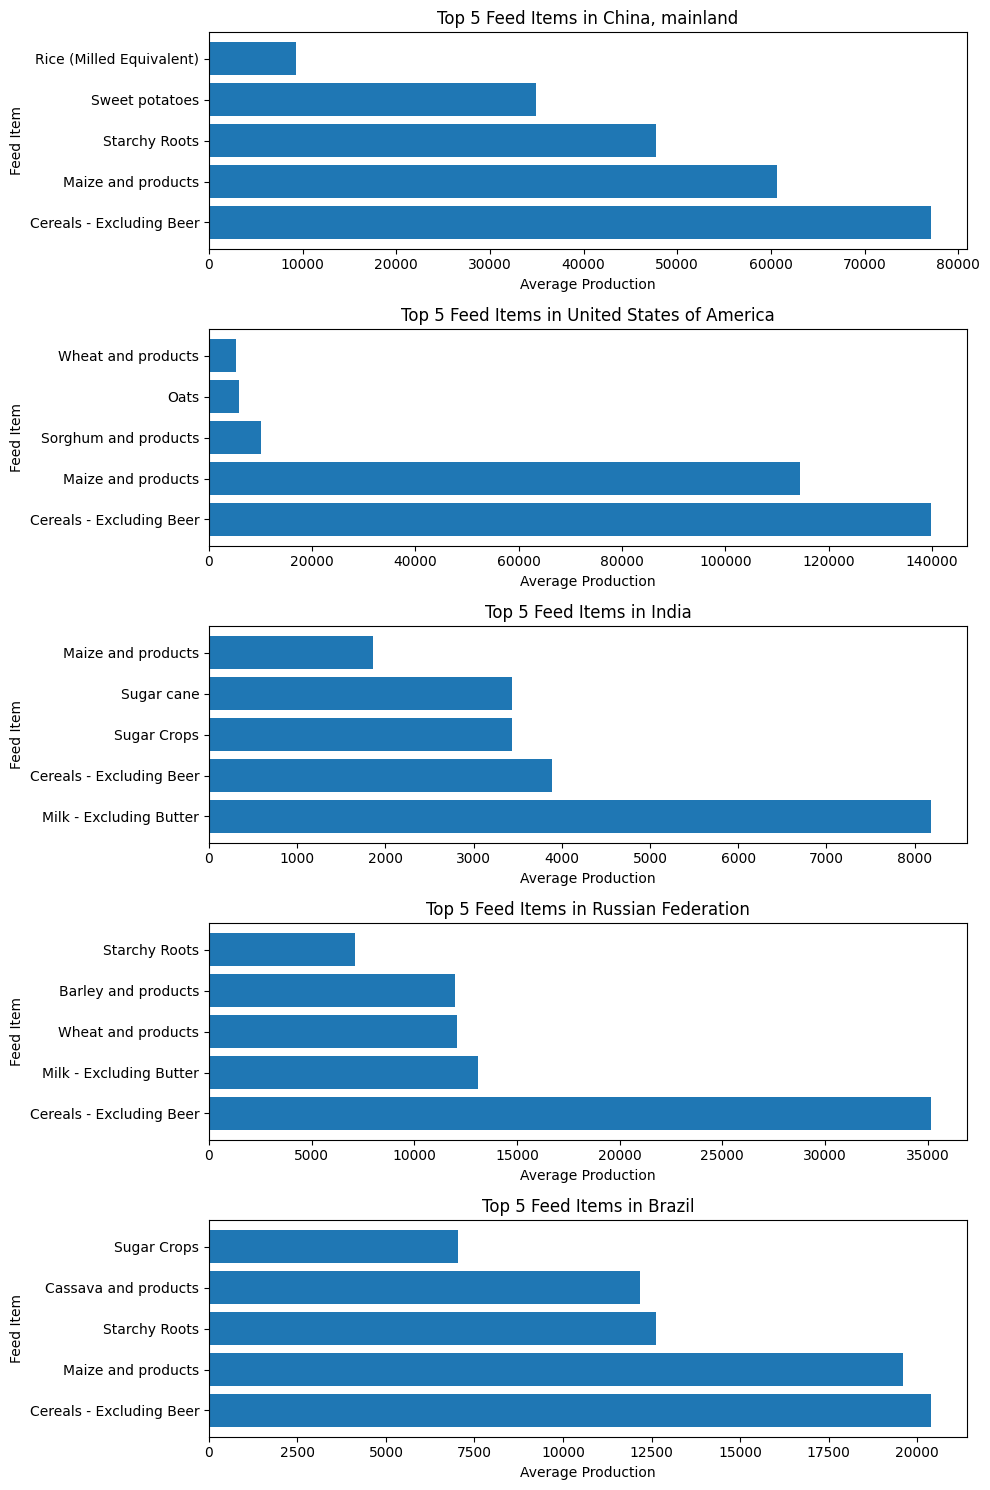

In [46]:
fig, axes = plt.subplots(nrows=len(top_5_areas), figsize=(10, 15))

for i, area in enumerate(top_5_areas.index):
    country_data = top_5_feed[top_5_feed['area'] == area]
    
    axes[i].barh(country_data['item'], country_data['average_production'])
    axes[i].set_title(f'Top 5 Feed Items in {area}')
    axes[i].set_xlabel('Average Production')
    axes[i].set_ylabel('Feed Item')

plt.tight_layout()
plt.show()

#### Get the top 3 continents in terms of average_production


In [47]:
top_3_continents = merged_df.groupby('continent')['average_production'].mean().nlargest(3)
top_3_continents

continent
Asia             622.694665
Europe           381.951031
North America    367.167041
Name: average_production, dtype: float64

#### Filter food and feed in top 3 continents


In [48]:
food_by_continent = (merged_df['continent'].isin(top_3_continents.index)) & (merged_df['element'] == 'Food')
feed_by_continent = (merged_df['continent'].isin(top_3_continents.index)) & (merged_df['element'] == 'Feed')

In [49]:
merged_df[food_by_continent].groupby(['continent', 'item'])['average_production'].mean().reset_index()

,continent,item,average_production
0,Asia,Alcoholic Beverages,776.129652
1,Asia,Animal fats,102.381045
2,Asia,Apples and products,335.062093
3,Asia,"Aquatic Animals, Others",11.501572
4,Asia,Aquatic Plants,102.254717
...,...,...,...
332,North America,Vegetables,1566.632075
333,North America,"Vegetables, Other",955.533805
334,North America,Wheat and products,1115.852987
335,North America,Wine,82.114780


#### Get top 5 food per continent in top 3


In [51]:
top_5_food_per_continent = merged_df[food_by_continent].groupby(['continent', 'item'])['average_production'].mean()
top_5_food_per_continent = top_5_food_per_continent.groupby('continent').nlargest(5).reset_index(level=0, drop=True).reset_index()

top_5_food_per_continent

,continent,item,average_production
0,Asia,Cereals - Excluding Beer,10403.500519
1,Asia,Vegetables,6758.719972
2,Asia,"Vegetables, Other",5669.591011
3,Asia,Rice (Milled Equivalent),5141.526036
4,Asia,Wheat and products,3955.016737
5,Europe,Milk - Excluding Butter,3754.838288
6,Europe,Cereals - Excluding Beer,2483.678420
7,Europe,Wheat and products,2037.388087
8,Europe,Vegetables,2011.915912
9,Europe,Starchy Roots,1774.273747


#### Plot top 5 food per continent in top 3


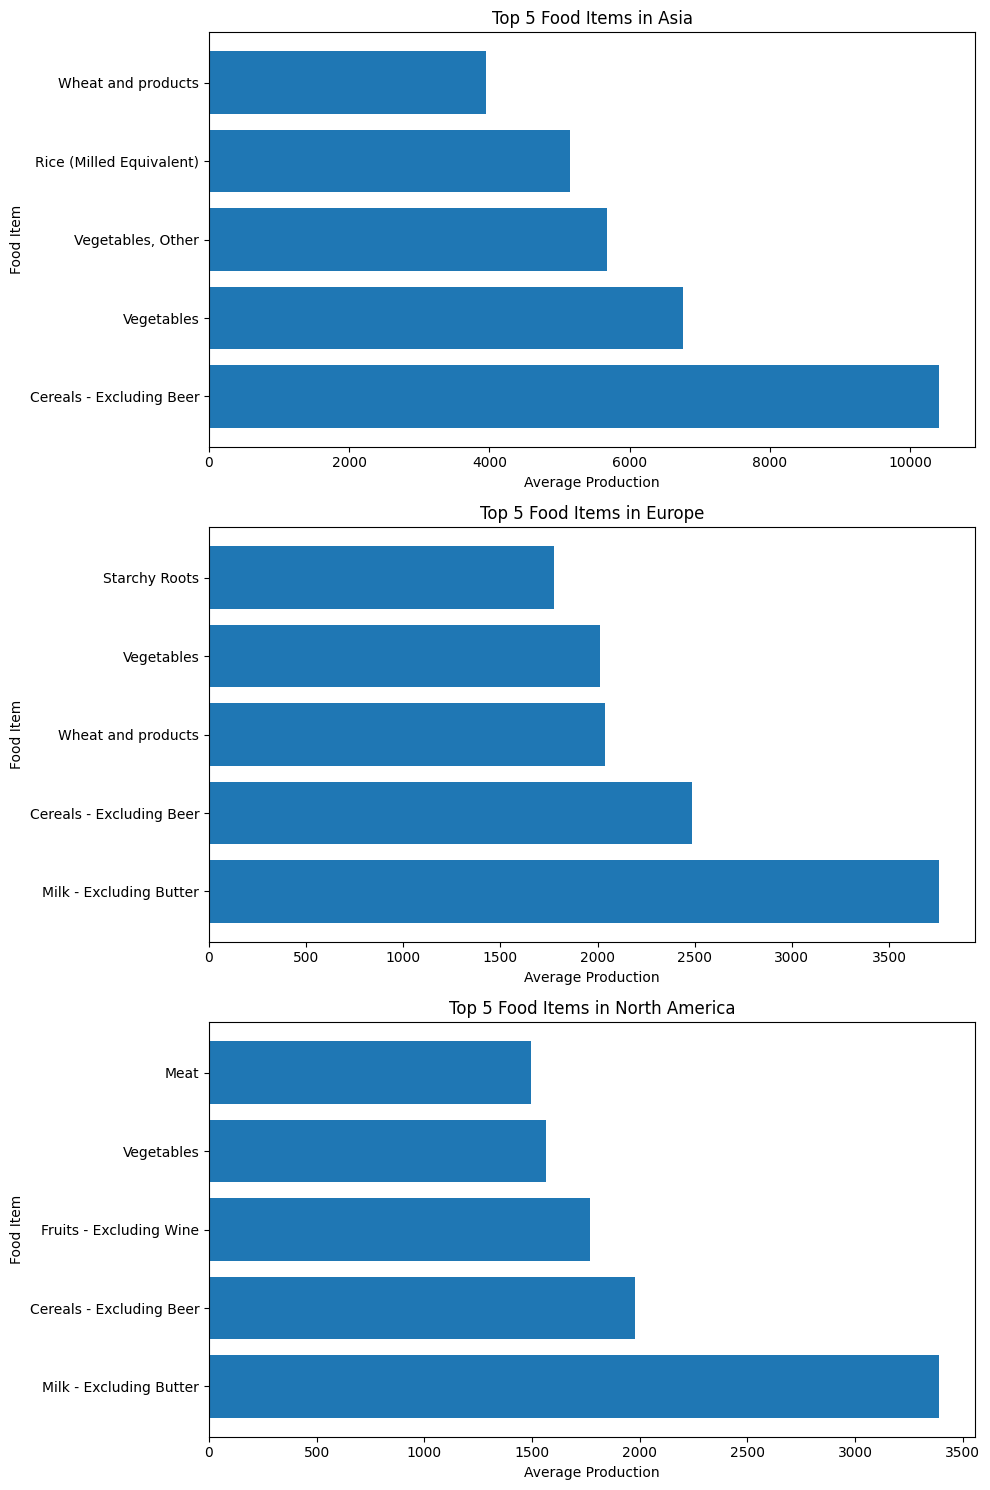

In [52]:
fig, axes = plt.subplots(nrows=len(top_3_continents), figsize=(10, 15))

for i, continent in enumerate(top_3_continents.index):
    country_data = top_5_food_per_continent[top_5_food_per_continent['continent'] == continent]
    
    axes[i].barh(country_data['item'], country_data['average_production'])
    axes[i].set_title(f'Top 5 Food Items in {continent}')
    axes[i].set_xlabel('Average Production')
    axes[i].set_ylabel('Food Item')

plt.tight_layout()
plt.show()

In [53]:
merged_df[feed_by_continent].groupby(['continent', 'item'])['average_production'].mean().reset_index()

,continent,item,average_production
0,Asia,Animal fats,2.707925
1,Asia,Apples and products,23.048671
2,Asia,Aquatic Plants,153.358491
3,Asia,"Aquatic Products, Other",153.358491
4,Asia,Bananas,410.641509
...,...,...,...
205,North America,Sweet potatoes,10.836478
206,North America,Vegetables,66.691824
207,North America,"Vegetables, Other",66.691824
208,North America,Wheat and products,862.998113


#### Get top 5 feed per continent in top 3


In [54]:
top_5_feed_per_continent = merged_df[feed_by_continent].groupby(['continent', 'item'])['average_production'].mean()
top_5_feed_per_continent = top_5_feed_per_continent.groupby('continent').nlargest(5).reset_index(level=0, drop=True).reset_index()

top_5_feed_per_continent

,continent,item,average_production
0,Asia,Cereals - Excluding Beer,3329.961065
1,Asia,Sweet potatoes,2622.101078
2,Asia,Maize and products,2299.833410
3,Asia,Starchy Roots,1597.706376
4,Asia,Sugar cane,1200.973046
5,Europe,Cereals - Excluding Beer,5562.473826
6,Europe,Barley and products,1605.327126
7,Europe,Maize and products,1513.865712
8,Europe,Wheat and products,1500.091547
9,Europe,Starchy Roots,1486.940799


#### Plot top 5 feed per continent in top 3


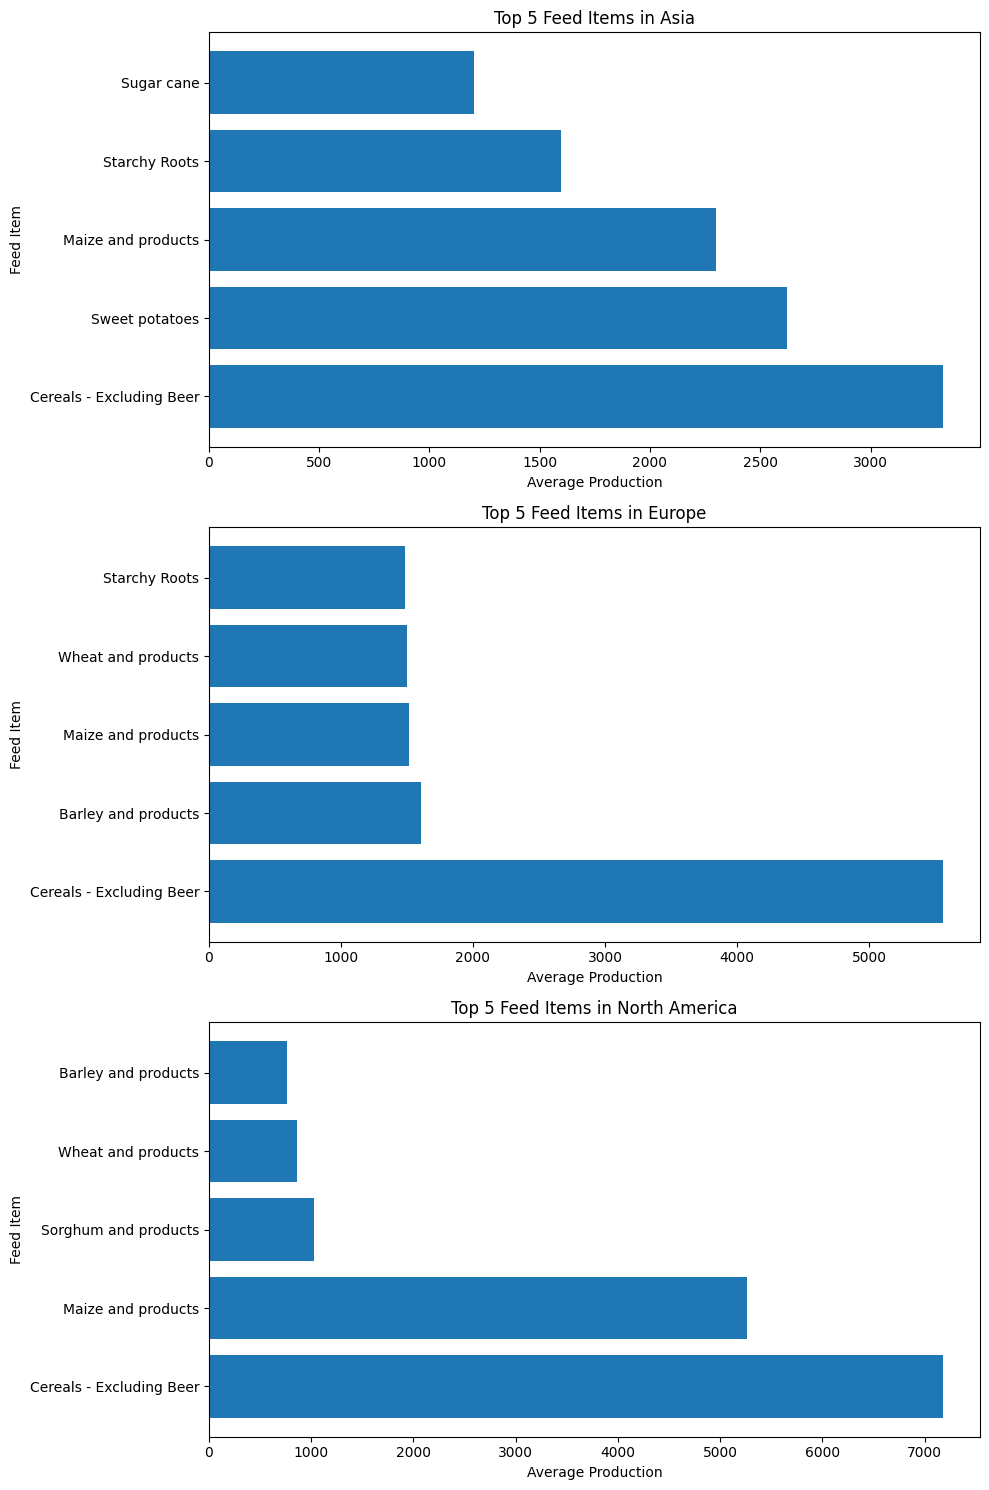

In [55]:
fig, axes = plt.subplots(nrows=len(top_3_continents), figsize=(10, 15))

for i, continent in enumerate(top_3_continents.index):
    country_data = top_5_feed_per_continent[top_5_feed_per_continent['continent'] == continent]
    
    axes[i].barh(country_data['item'], country_data['average_production'])
    axes[i].set_title(f'Top 5 Feed Items in {continent}')
    axes[i].set_xlabel('Average Production')
    axes[i].set_ylabel('Feed Item')

plt.tight_layout()
plt.show()